Засоби підготовки та аналізу даних

ФБ-22 Радіонов Арсеній 

Лабораторна робота №6

**Виконання:**

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу результатів.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

slope = 7  #нахил
intercept = -5  #зміщення

num_points = 50

x_values = np.random.uniform(-10, 10, num_points)

error_values = np.random.normal(0, 10, num_points)
y_values = slope * x_values + intercept + error_values

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [60]:
def least_squares_approximation(x_data, y_data):
    
    x_mean_value = x_data.mean()
    y_mean_value = y_data.mean()

    estimated_slope = ((x_data - x_mean_value) * (y_data - y_mean_value)).sum() / ((x_data - x_mean_value)**2).sum()

    estimated_intercept = y_mean_value - estimated_slope * x_mean_value

    return estimated_slope, estimated_intercept

estimated_slope, estimated_intercept = least_squares_approximation(x_values, y_values)

print("Estimated slope:", estimated_slope)
print("Estimated intercept:", estimated_intercept)
print("Original slope value:", slope)
print("Original intercept value:", intercept)

Estimated slope: 7.124053913049228
Estimated intercept: -4.171373193785164
Original slope value: 7
Original intercept value: -5


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [61]:
polyfit_params = np.polyfit(x_values, y_values, 1)

print("Estimated slope using np.polyfit():", polyfit_params[0])
print("Estimated intercept using np.polyfit():", polyfit_params[1])

Estimated slope using np.polyfit(): 7.124053913049228
Estimated intercept using np.polyfit(): -4.171373193785167


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

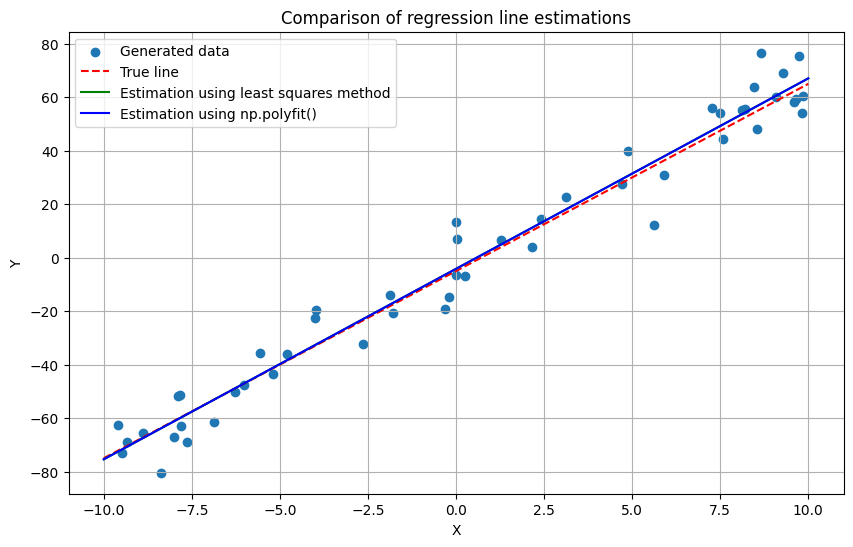

In [35]:
line_x = np.linspace(-10, 10, 100)
line_y_true = slope * line_x + intercept
line_y_estimated = estimated_slope * line_x + estimated_intercept
line_y_polyfit = polyfit_params[0] * line_x + polyfit_params[1]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Generated data')
plt.plot(line_x, line_y_true, color='red', linestyle='--', label='True line')
plt.plot(line_x, line_y_estimated, color='green', label='Estimation using least squares method')
plt.plot(line_x, line_y_polyfit, color='blue', label='Estimation using np.polyfit()')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of regression line estimations')
plt.legend()
plt.grid(True)
plt.show()

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [56]:
def gradient_descent(x_data, y_data, learning_rate=0.01, n_iter=1000):
    slope = np.random.randn()
    intercept = np.random.randn()
    
    m = len(x_data)
    
    for _ in range(n_iter):
        slope_gradient = -(2/m) * np.sum(x_data * (y_data - (slope*x_data + intercept)))
        intercept_gradient = -(2/m) * np.sum(y_data - (slope*x_data + intercept))

        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
    return slope, intercept

learning_rate = 0.01
n_iter = 1000

optimal_slope, optimal_intercept = gradient_descent(x_values, y_values, learning_rate, n_iter)
print("Optimal slope:", optimal_slope)
print("Optimal intercept:", optimal_intercept)

Optimal slope: 7.124053912947048
Optimal intercept: -4.171373185474093


Додайте отриману лінію регресії на загальний графік

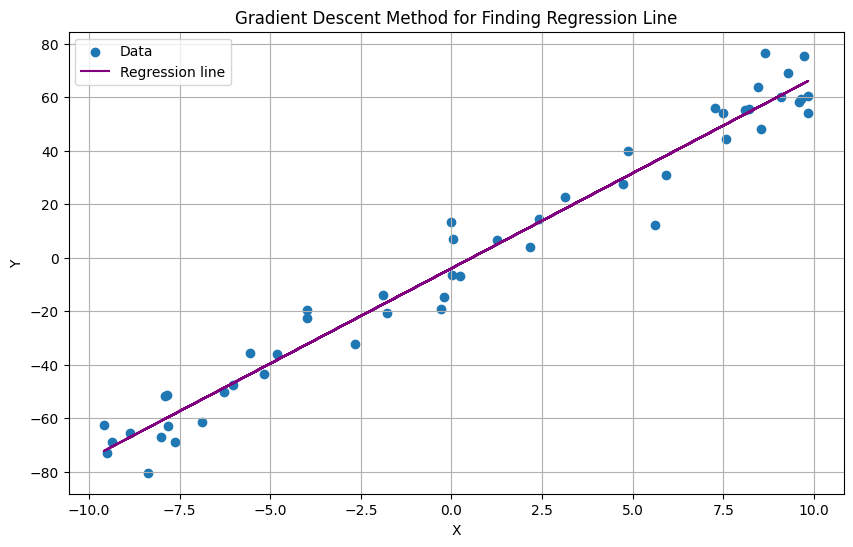

In [55]:
regression_line = optimal_k * x_values + optimal_b

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, label='Data')
plt.plot(x_values, regression_line, color='purple', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Descent Method for Finding Regression Line')
plt.legend()
plt.grid(True)
plt.show()

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

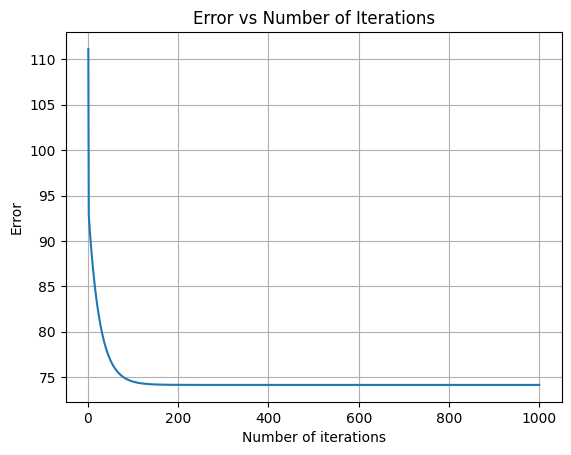

In [57]:
def gradient_descent_loss(x_data, y_data, learning_rate=0.01, n_iter=1000):
    slope = np.random.randn()
    intercept = np.random.randn()
    
    num_points = len(x_data)
    
    loss_history = []
    
    for _ in range(n_iter):
        slope_gradient = -(2/num_points) * np.sum(x_data * (y_data - (slope*x_data + intercept)))
        intercept_gradient = -(2/num_points) * np.sum(y_data - (slope*x_data + intercept))
        
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        loss = np.mean((y_data - (slope*x_data + intercept))**2)
        loss_history.append(loss)
        
    return slope, intercept, loss_history

optimal_slope, optimal_intercept, loss_history = gradient_descent_loss(x_values, y_values, learning_rate, n_iter)


plt.plot(np.arange(1, n_iter + 1), loss_history)
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.title('Error vs Number of Iterations')
plt.grid(True)
plt.show()


Порівняйте отримані результати з результатами попереднього завдання

In [58]:
estimated_k_polyfit = polyfit_params[0]
estimated_b_polyfit = polyfit_params[1]

print("Optimal slope (gradient descent):", optimal_k)
print("Optimal intercept (gradient descent):", optimal_b)
print("Estimated slope (least squares method):", estimated_k)
print("Estimated intercept (least squares method):", estimated_b)
print("Estimated slope (np.polyfit()):", estimated_k_polyfit)
print("Estimated intercept (np.polyfit()):", estimated_b_polyfit)

Optimal slope (gradient descent): 7.1224124647194635
Optimal intercept (gradient descent): -3.9991233180321646
Estimated slope (least squares method): 7.122412464661513
Estimated intercept (least squares method): -3.999123323521173
Estimated slope (np.polyfit()): 7.124053913049228
Estimated intercept (np.polyfit()): -4.171373193785167
